In [130]:
import requests
import lxml.html as lh
import pandas as pd
from bs4 import BeautifulSoup

In [131]:
data = []
count = 1
for year in range(2000,2019):
    website_url = requests.get('https://www.basketball-reference.com/draft/NBA_'+str(year)+'.html')
    soup = BeautifulSoup(website_url.content,'lxml')
    soup.prettify()
    My_table = soup.find('table',{'id':"stats"})
    tabledata = My_table.findAll('td')
    for cell in tabledata:
        count = count + 1
        data.append(cell.get_text())

In [132]:
data.remove('Minnesota forfeited the 29th overall pick.')
data.remove('Minnesota forfeited the 29th overall pick.')

In [133]:
import numpy as np
data2 = np.array(data)
refined = np.reshape(data2, (-1, 21))

In [134]:
refined

array([['1', 'NJN', 'Kenyon Martin', ..., '.100', '0.7', '15.5'],
       ['2', 'VAN', 'Stromile Swift', ..., '.095', '-1.9', '0.2'],
       ['3', 'LAC', 'Darius Miles', ..., '.039', '-1.2', '2.3'],
       ...,
       ['58', 'DEN', 'Thomas Welsh', ..., '.162', '-2.6', '0.0'],
       ['59', 'PHO', 'George King', ..., '-.001', '-10.6', '0.0'],
       ['60', 'PHI', 'Kostas Antetokounmpo', ..., '-.247', '-13.3',
        '0.0']], dtype='<U51')

In [135]:
tableheader = My_table.findAll('th')
headers = []
count = 0
for item in tableheader:
    if (count < 31):
        headers.append(item.get_text())
        count=count+1
headers.remove('Rk')
headers = headers[9:]
#headers = ['']
print(headers)

['Pk', 'Tm', 'Player', 'College', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%', '3P%', 'FT%', 'MP', 'PTS', 'TRB', 'AST', 'WS', 'WS/48', 'BPM', 'VORP']


In [138]:
import pandas as pd
df1 = pd.DataFrame(refined, columns=headers)
df1.head()

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,3P%,FT%,MP,PTS,TRB,AST,WS,WS/48,BPM,VORP
0,1,NJN,Kenyon Martin,University of Cincinnati,15,757,23134,9325,5159,1439,...,.234,.629,30.6,12.3,6.8,1.9,48.0,.100,0.7,15.5
1,2,VAN,Stromile Swift,Louisiana State University,9,547,10804,4582,2535,275,...,.074,.699,19.8,8.4,4.6,0.5,21.3,.095,-1.9,0.2
2,3,LAC,Darius Miles,,7,446,11730,4507,2190,840,...,.168,.590,26.3,10.1,4.9,1.9,9.5,.039,-1.2,2.3
3,4,CHI,Marcus Fizer,Iowa State University,6,289,6032,2782,1340,352,...,.191,.691,20.9,9.6,4.6,1.2,2.7,.022,-4.7,-4.1
4,5,ORL,Mike Miller,University of Florida,17,1032,27812,10973,4376,2666,...,.407,.769,26.9,10.6,4.2,2.6,60.7,.105,0.9,20.3


In [99]:
col = df1.columns
cols = []
for co in col:
    cols.append(co)
cols = cols[4:]
print(cols)

['Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%', '3P%', 'FT%', 'MP', 'PTS', 'TRB', 'AST', 'WS', 'WS/48', 'BPM', 'VORP']


In [141]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('DraftData.csv')
#df = pd.read_csv('CollegeRookieStatLog2.csv')
df.head()

,Unnamed: 0,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,0,1,NJN,Kenyon Martin,University of Cincinnati,15.0,757.0,23134.0,9325.0,5159.0,...,0.234,0.629,30.6,12.3,6.8,1.9,48.0,0.100,0.7,15.5
1,1,2,VAN,Stromile Swift,Louisiana State University,9.0,547.0,10804.0,4582.0,2535.0,...,0.074,0.699,19.8,8.4,4.6,0.5,21.3,0.095,-1.9,0.2
2,2,3,LAC,Darius Miles,NaN,7.0,446.0,11730.0,4507.0,2190.0,...,0.168,0.590,26.3,10.1,4.9,1.9,9.5,0.039,-1.2,2.3
3,3,4,CHI,Marcus Fizer,Iowa State University,6.0,289.0,6032.0,2782.0,1340.0,...,0.191,0.691,20.9,9.6,4.6,1.2,2.7,0.022,-4.7,-4.1
4,4,5,ORL,Mike Miller,University of Florida,17.0,1032.0,27812.0,10973.0,4376.0,...,0.407,0.769,26.9,10.6,4.2,2.6,60.7,0.105,0.9,20.3


In [142]:
df = df.drop(['Unnamed: 0'], axis=1)

In [143]:
col = df.columns
cols = []
for co in col:
    cols.append(co)
cols = cols[4:]
print(cols)

['Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%', '3P%', 'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1', 'WS', 'WS/48', 'BPM', 'VORP']


In [144]:
for col in cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [145]:
df.head()

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,1,NJN,Kenyon Martin,University of Cincinnati,15.0,757.0,23134.0,9325.0,5159.0,1439.0,...,0.234,0.629,30.6,12.3,6.8,1.9,48.0,0.100,0.7,15.5
1,2,VAN,Stromile Swift,Louisiana State University,9.0,547.0,10804.0,4582.0,2535.0,275.0,...,0.074,0.699,19.8,8.4,4.6,0.5,21.3,0.095,-1.9,0.2
2,3,LAC,Darius Miles,NaN,7.0,446.0,11730.0,4507.0,2190.0,840.0,...,0.168,0.590,26.3,10.1,4.9,1.9,9.5,0.039,-1.2,2.3
3,4,CHI,Marcus Fizer,Iowa State University,6.0,289.0,6032.0,2782.0,1340.0,352.0,...,0.191,0.691,20.9,9.6,4.6,1.2,2.7,0.022,-4.7,-4.1
4,5,ORL,Mike Miller,University of Florida,17.0,1032.0,27812.0,10973.0,4376.0,2666.0,...,0.407,0.769,26.9,10.6,4.2,2.6,60.7,0.105,0.9,20.3


In [149]:
df['Year']=s

In [152]:
df.head()

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Year
0,1,NJN,Kenyon Martin,University of Cincinnati,15.0,757.0,23134.0,9325.0,5159.0,1439.0,...,0.629,30.6,12.3,6.8,1.9,48.0,0.100,0.7,15.5,2000
1,2,VAN,Stromile Swift,Louisiana State University,9.0,547.0,10804.0,4582.0,2535.0,275.0,...,0.699,19.8,8.4,4.6,0.5,21.3,0.095,-1.9,0.2,2000
3,4,CHI,Marcus Fizer,Iowa State University,6.0,289.0,6032.0,2782.0,1340.0,352.0,...,0.691,20.9,9.6,4.6,1.2,2.7,0.022,-4.7,-4.1,2000
4,5,ORL,Mike Miller,University of Florida,17.0,1032.0,27812.0,10973.0,4376.0,2666.0,...,0.769,26.9,10.6,4.2,2.6,60.7,0.105,0.9,20.3,2000
5,6,ATL,DerMarr Johnson,University of Cincinnati,7.0,344.0,5930.0,2121.0,769.0,304.0,...,0.789,17.2,6.2,2.2,0.9,6.4,0.052,-1.6,0.6,2000


In [151]:
df=df.dropna()

In [153]:
df.to_csv("DraftData.csv")

In [154]:
df1 = df.copy(deep=True)
df1 = df1.drop(['Tm','Player','College'], axis=1)

In [155]:
df1.head()

,Pk,Yrs,G,MP,PTS,TRB,AST,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Year
0,1,15.0,757.0,23134.0,9325.0,5159.0,1439.0,0.483,0.234,0.629,30.6,12.3,6.8,1.9,48.0,0.100,0.7,15.5,2000
1,2,9.0,547.0,10804.0,4582.0,2535.0,275.0,0.473,0.074,0.699,19.8,8.4,4.6,0.5,21.3,0.095,-1.9,0.2,2000
3,4,6.0,289.0,6032.0,2782.0,1340.0,352.0,0.435,0.191,0.691,20.9,9.6,4.6,1.2,2.7,0.022,-4.7,-4.1,2000
4,5,17.0,1032.0,27812.0,10973.0,4376.0,2666.0,0.459,0.407,0.769,26.9,10.6,4.2,2.6,60.7,0.105,0.9,20.3,2000
5,6,7.0,344.0,5930.0,2121.0,769.0,304.0,0.411,0.336,0.789,17.2,6.2,2.2,0.9,6.4,0.052,-1.6,0.6,2000


AxesSubplot(0.127273,0.125;0.617727x0.755)


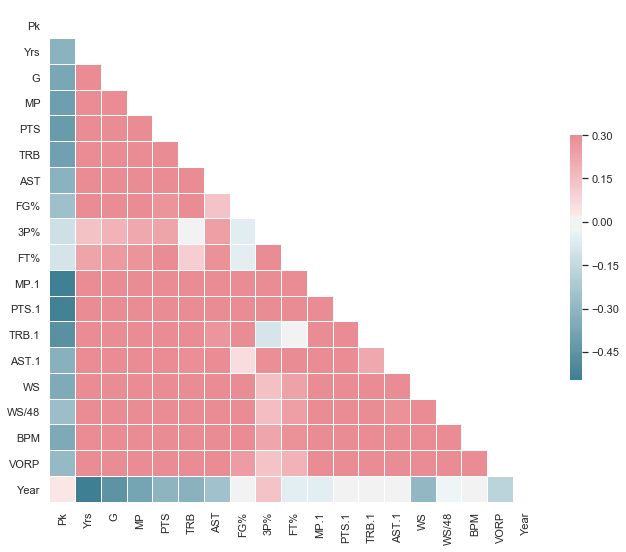

In [156]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df1

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

In [125]:
['59'*60]

['595959595959595959595959595959595959595959595959595959595959595959595959595959595959595959595959595959595959595959595959']

In [147]:
x = list(range(2000,2019))
y = [58, 57, 57, 58, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60]
s = []

for a, b in zip(x, y):
    s.extend([a] * b)

print(s)

[2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2001, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 2002, 200

In [148]:
len(s)

1129

In [128]:
len(df)

716

In [129]:
df.head()

,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,AST,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP
0,1,NJN,Kenyon Martin,University of Cincinnati,15.0,757.0,23134.0,9325.0,5159.0,1439.0,...,0.234,0.629,30.6,12.3,6.8,1.9,48.0,0.100,0.7,15.5
1,2,VAN,Stromile Swift,Louisiana State University,9.0,547.0,10804.0,4582.0,2535.0,275.0,...,0.074,0.699,19.8,8.4,4.6,0.5,21.3,0.095,-1.9,0.2
3,4,CHI,Marcus Fizer,Iowa State University,6.0,289.0,6032.0,2782.0,1340.0,352.0,...,0.191,0.691,20.9,9.6,4.6,1.2,2.7,0.022,-4.7,-4.1
4,5,ORL,Mike Miller,University of Florida,17.0,1032.0,27812.0,10973.0,4376.0,2666.0,...,0.407,0.769,26.9,10.6,4.2,2.6,60.7,0.105,0.9,20.3
5,6,ATL,DerMarr Johnson,University of Cincinnati,7.0,344.0,5930.0,2121.0,769.0,304.0,...,0.336,0.789,17.2,6.2,2.2,0.9,6.4,0.052,-1.6,0.6


In [157]:
df1.columns

Index(['Pk', 'Yrs', 'G', 'MP', 'PTS', 'TRB', 'AST', 'FG%', '3P%', 'FT%',
       'MP.1', 'PTS.1', 'TRB.1', 'AST.1', 'WS', 'WS/48', 'BPM', 'VORP',
       'Year'],
      dtype='object')

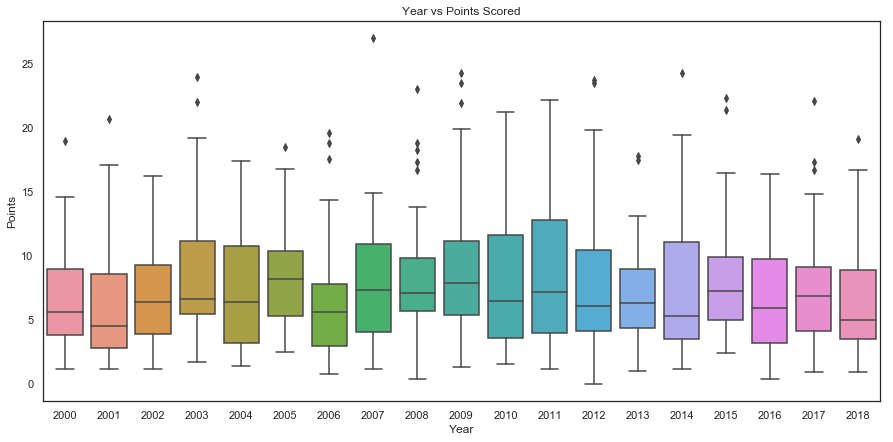

In [159]:
import seaborn
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year vs Points Scored')
seaborn.boxplot(df1['Year'], df1['PTS.1'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()

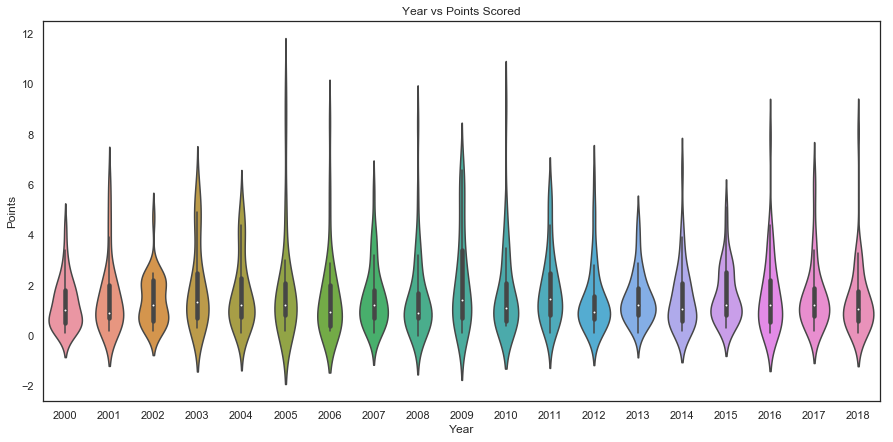

In [161]:
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Year vs Points Scored')
seaborn.violinplot(df1['Year'], df1['AST.1'], ax=ax)
plt.xlabel('Year')
plt.ylabel('Points')
plt.show()